In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings(action='ignore')

## Build model using LinearRegression

In [2]:
cars = pd.read_csv("old_cars.csv")

In [3]:
cars.columns

Index(['make', 'fuel-type', 'num-of-doors', 'body-style', 'drive-wheels',
       'curb-weight', 'engine-size', 'highway-mpg', 'wheel-base', 'price'],
      dtype='object')

In [4]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [5]:
X.sample(5)

,make,fuel-type,num-of-doors,body-style,drive-wheels,curb-weight,engine-size,highway-mpg,wheel-base
64,mercedes-benz,diesel,four,sedan,rwd,3515,183,25,110.0
4,audi,gas,four,sedan,4wd,2824,136,22,99.4
180,volkswagen,diesel,four,sedan,fwd,2264,97,46,97.3
199,volvo,diesel,four,sedan,rwd,3217,145,27,109.1
74,mitsubishi,gas,two,hatchback,fwd,1944,92,38,93.7


In [6]:
X  = pd.get_dummies(X)

In [7]:
X.shape,y.shape

((201, 39), (201,))

In [8]:
X.columns

Index(['curb-weight', 'engine-size', 'highway-mpg', 'wheel-base',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_diesel', 'fuel-type_gas', 'num-of-doors_?',
       'num-of-doors_four', 'num-of-doors_two', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_4wd', 'drive-wheels_fwd',
       'drive-wheels_rwd'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [12]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
# Display coefficient for each column
for t in zip(X_train.columns, model.coef_):
    print(f"{t[0]:25s} {t[1]:.0f}")

curb-weight               6
engine-size               34
highway-mpg               -55
wheel-base                67
make_alfa-romero          -1921
make_audi                 2571
make_bmw                  7784
make_chevrolet            -44
make_dodge                -1989
make_honda                -1091
make_isuzu                -5830
make_jaguar               5869
make_mazda                -1143
make_mercedes-benz        6363
make_mercury              -1360
make_mitsubishi           -2767
make_nissan               -1654
make_peugot               -3988
make_plymouth             -2604
make_porsche              12177
make_renault              -3024
make_saab                 -301
make_subaru               -2260
make_toyota               -2923
make_volkswagen           -1441
make_volvo                -422
fuel-type_diesel          -38
fuel-type_gas             38
num-of-doors_?            62
num-of-doors_four         -36
num-of-doors_two          -26
body-style_convertible    3169
body-styl

In [14]:
model.intercept_

-10323.35397457963

### Calculate accuracy with train data

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [16]:
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train,y_pred)
print("MSE  : ", mse )
print("RMSE : ", np.sqrt(mse))

MSE  :  3894987.049060841
RMSE :  1973.5721545109116


In [17]:
r2score = r2_score(y_train,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.93


### Test with test data

In [18]:
y_pred = model.predict(X_test)

In [19]:
## get MSE 
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error : {rmse:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 6426967.32
Root Mean Squared Error : 2535.15
R2 Score: 0.93


<Axes: ylabel='price'>

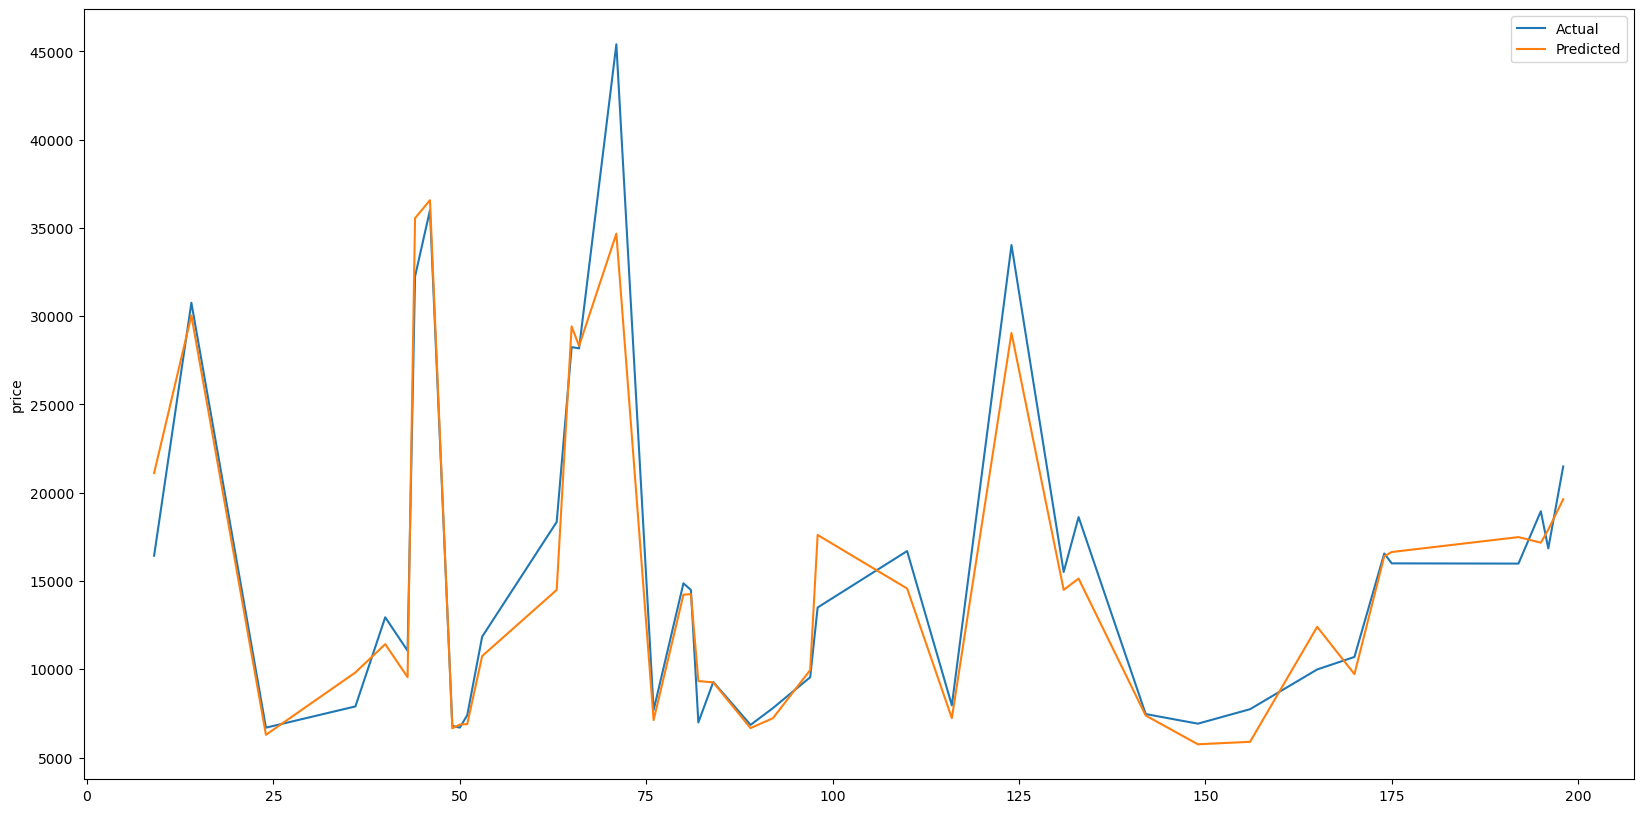

In [20]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

In [21]:
# Display % of difference 
for p,a in zip(y_pred[:10],y_test[:10]):
    d = p - a
    print(f"{p:6.0f}  -  {a:6.0f} - {p - a:6.0f} - {abs(d / a * 100):5.2f}")

 34674  -   45400 - -10726 - 23.63
  6287  -    6692 -   -405 -  6.05
  6896  -    7395 -   -499 -  6.75
 16404  -   16558 -   -154 -  0.93
  9954  -    9549 -    405 -  4.25
 11422  -   12945 -  -1523 - 11.77
 29048  -   34028 -  -4980 - 14.64
  9256  -    9279 -    -23 -  0.25
  7380  -    7463 -    -83 -  1.11
 14498  -   15510 -  -1012 -  6.52


## Model with Standardization 

In [23]:
cars = pd.read_csv("old_cars.csv")

In [24]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [25]:
X = pd.get_dummies(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
## Scale X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_data = pd.DataFrame(X_train_scaled,columns = X.columns)

In [30]:
X_test_data = pd.DataFrame(X_test_scaled,columns = X.columns)

In [31]:
X_test_data.head()

,curb-weight,engine-size,highway-mpg,wheel-base,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,...,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,2.413275,4.982797,-2.238975,2.243682,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,...,-1.119608,1.148408,-0.197386,5.567764,-0.733799,-0.916013,-0.377964,-0.229416,-1.224745,1.362770
1,-1.071322,-0.923353,1.017716,-0.806509,-0.138233,-0.197386,-0.197386,-0.138233,4.358899,-0.271708,...,0.893170,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799
2,-1.150058,-0.895755,1.017716,-0.906515,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,...,0.893170,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799
3,0.921319,1.312152,-1.054724,0.726920,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,...,-1.119608,1.148408,-0.197386,-0.179605,1.362770,-0.916013,-0.377964,-0.229416,-1.224745,1.362770
4,-0.439410,-0.095388,0.425590,-0.223139,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,...,0.893170,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799


In [32]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test_scaled)

In [34]:
## get MSE 
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared Error : {rmse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 6423124.19
Root Mean Squared Error : 2534.39
Mean Absolute Error : 1641.90
R2 Score: 0.93


### Micro model with 2 features 

In [35]:
# Micro model
X_micro =  X[['engine-size','highway-mpg']]
y_micro =  y

In [36]:
X_micro_train, X_micro_test, y_micro_train, y_micro_test = train_test_split(X_micro,y_micro, test_size=0.2, random_state=0)

In [37]:
micro_model = LinearRegression()
micro_model.fit(X_micro_train,y_micro_train)

LinearRegression()

In [38]:
micro_model.score(X_micro_train,y_micro_train) # r2 for train data 

0.7796926906820936

In [39]:
y_micro_pred = micro_model.predict(X_micro_test)

In [40]:
r2score = r2_score(y_micro_test,y_micro_pred)
print(f"R2 Score: {r2score:0.2f}")

mse = mean_squared_error(y_micro_test,y_micro_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error : {rmse:0.2f}")

R2 Score: 0.79
Mean Squared Error : 15885068.97
Root Mean Squared Error : 3985.61


## RandomForestRegressor 

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [43]:
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')

Train score : 0.9778771836575624


In [44]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.93


In [45]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  6049318.47780488
RMSE :  2459.5362322610495


In [46]:
for f,v in sorted(zip (X_train.columns, model.feature_importances_),key = lambda t : t[1], reverse = True):
      print(f"{f:30} {v:0.5f}")

engine-size                    0.52311
curb-weight                    0.32315
highway-mpg                    0.09350
make_bmw                       0.01630
wheel-base                     0.01341
make_toyota                    0.00315
body-style_wagon               0.00279
make_porsche                   0.00218
make_nissan                    0.00217
body-style_convertible         0.00209
make_audi                      0.00179
drive-wheels_rwd               0.00163
fuel-type_diesel               0.00129
body-style_hatchback           0.00121
num-of-doors_two               0.00119
drive-wheels_4wd               0.00116
make_volvo                     0.00110
make_peugot                    0.00110
body-style_sedan               0.00091
make_mazda                     0.00089
drive-wheels_fwd               0.00082
make_alfa-romero               0.00075
make_subaru                    0.00070
fuel-type_gas                  0.00056
make_mercedes-benz             0.00053
num-of-doors_four        

<Axes: ylabel='price'>

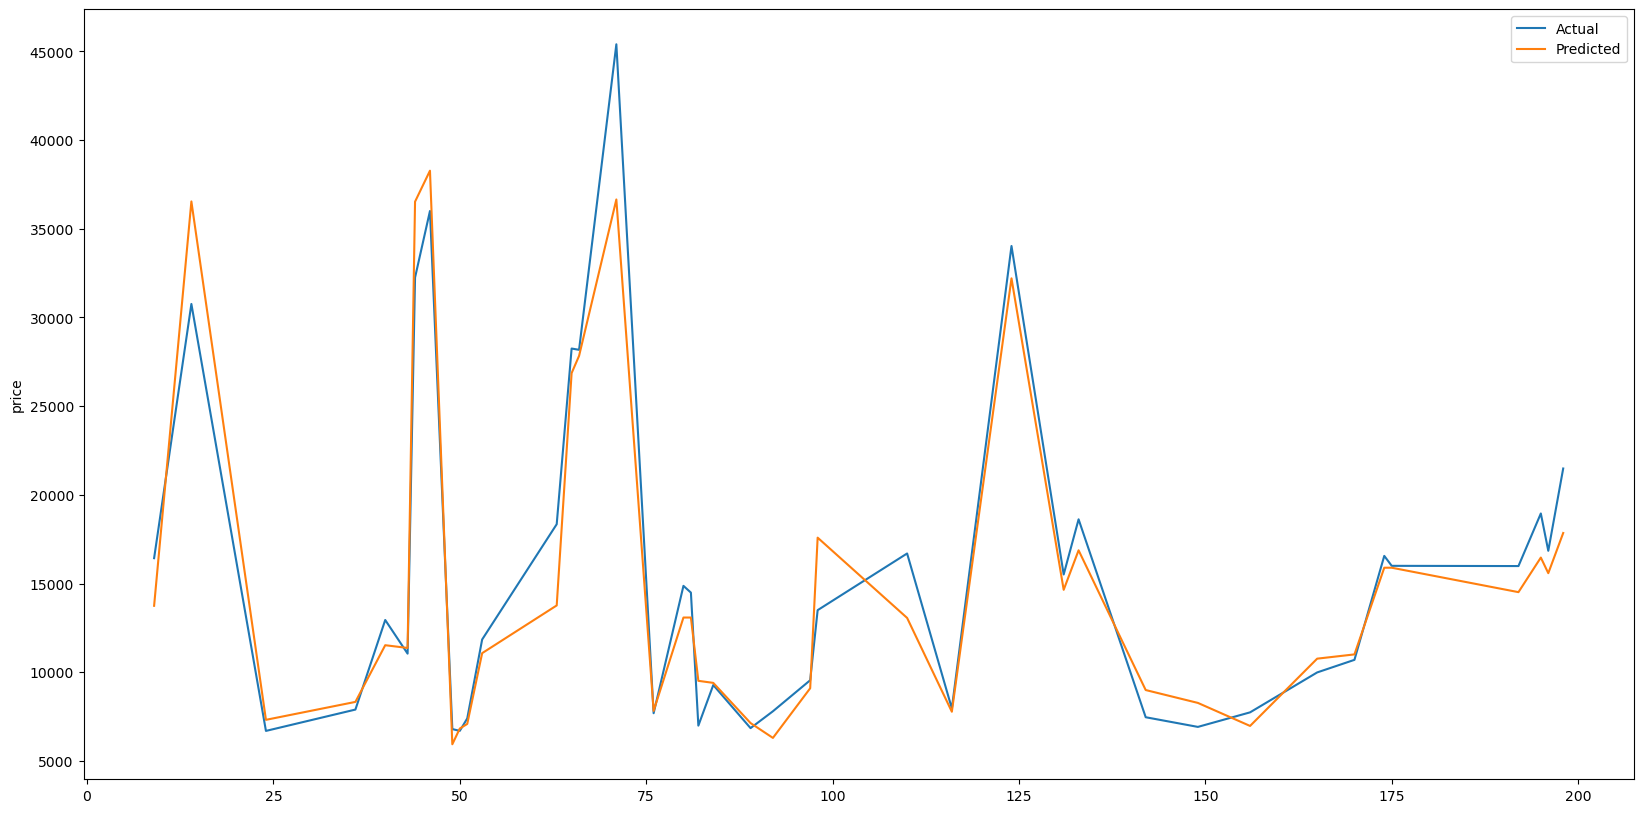

In [47]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")